In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.options.display.max_rows = 1000
#pd.set_option('display.max_rows', None)

#CSV import in right format
df = pd.read_csv('SpeedDatingData.csv', encoding = "ISO-8859-1")
#potential second dates !
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape
#8378 rows for 195 columns
#df.nunique()

(8378, 195)

In [3]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [4]:
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

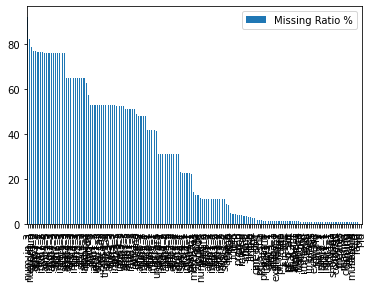

In [5]:
#Plotting the ratio of NaN values for each column

def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        #plt.rc('xtick', labelsize=20) 
        #plt.rc('ytick', labelsize=20) 
        #plt.axvline(x=50)
        plt.show()
    else:
        print('No NaNs found')
plot_nas(df)

font = {'weight' : 'bold','size'   : 30}

plt.rc('font', **font)
plot_width, plot_height = (64,72)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

In [6]:
#Filtering on columns with less than 50% of NaN values
df = df.loc[:, df.isnull().mean() < .4] 
df.isnull().sum()

iid           0
id            1
gender        0
idg           0
condtn        0
           ... 
attr3_2     915
sinc3_2     915
intel3_2    915
fun3_2      915
amb3_2      915
Length: 124, dtype: int64

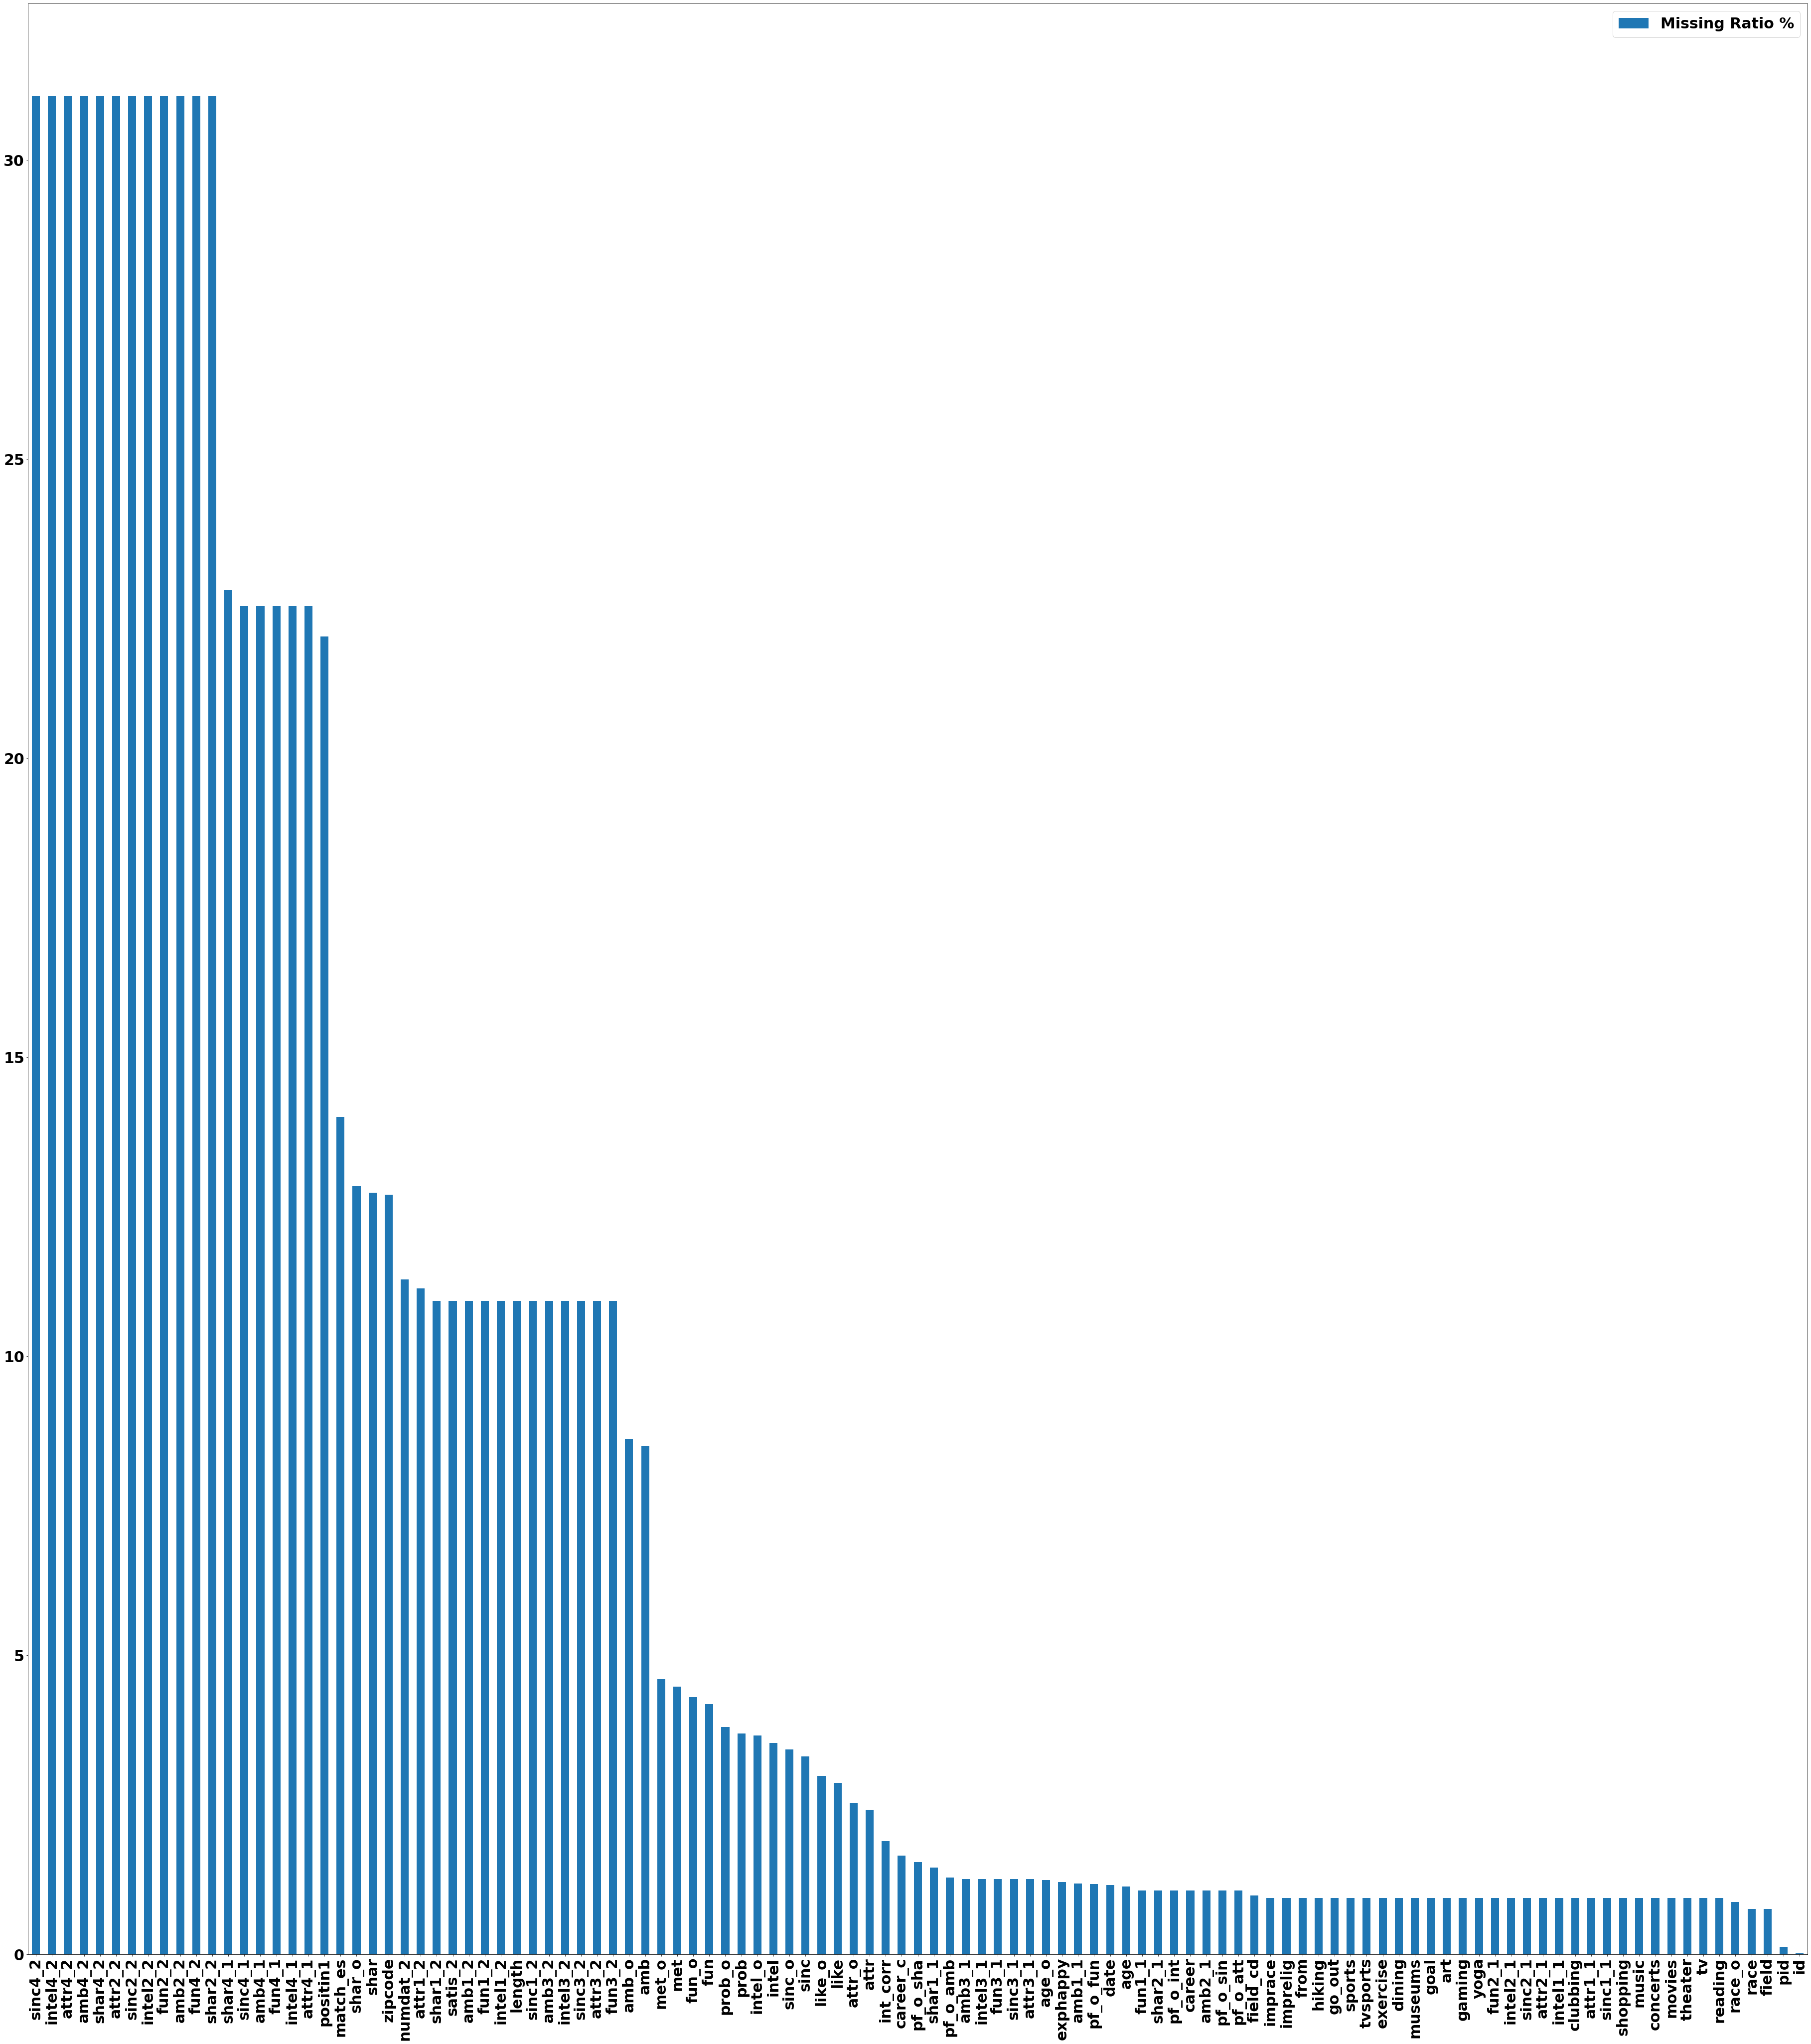

In [7]:
plot_nas(df)

In [8]:
df = df.dropna()
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
1846,132,1.0,0,1,1,6,5,2,2.0,5,...,15.09,13.21,18.87,15.09,18.87,9.0,10.0,8.0,10.0,10.0
1847,132,1.0,0,1,1,6,5,2,2.0,2,...,15.09,13.21,18.87,15.09,18.87,9.0,10.0,8.0,10.0,10.0
1849,132,1.0,0,1,1,6,5,2,2.0,4,...,15.09,13.21,18.87,15.09,18.87,9.0,10.0,8.0,10.0,10.0
1850,132,1.0,0,1,1,6,5,2,2.0,1,...,15.09,13.21,18.87,15.09,18.87,9.0,10.0,8.0,10.0,10.0
1856,134,3.0,0,5,1,6,5,4,4.0,2,...,17.50,12.50,20.00,12.50,15.00,7.0,8.0,9.0,7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,552,22.0,1,44,2,21,22,6,10.0,19,...,5.00,10.00,20.00,5.00,10.00,9.0,3.0,7.0,6.0,9.0
8367,552,22.0,1,44,2,21,22,9,10.0,22,...,5.00,10.00,20.00,5.00,10.00,9.0,3.0,7.0,6.0,9.0
8368,552,22.0,1,44,2,21,22,8,10.0,21,...,5.00,10.00,20.00,5.00,10.00,9.0,3.0,7.0,6.0,9.0
8369,552,22.0,1,44,2,21,22,4,10.0,17,...,5.00,10.00,20.00,5.00,10.00,9.0,3.0,7.0,6.0,9.0


In [9]:
correlation = df.corr()
correlation

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
iid,1.000000,0.068048,0.138187,0.070721,0.166907,0.993714,0.142011,0.097847,0.060696,0.039859,...,-0.109293,-0.251377,0.010700,-0.277650,-0.243281,-0.134137,-0.057352,-0.130427,0.051461,-0.034378
id,0.068048,1.000000,0.062277,0.998730,0.269966,0.025790,0.412681,0.144568,0.159488,0.167006,...,0.055803,0.022668,-0.023282,-0.032928,-0.023493,-0.058326,0.082684,0.059913,0.072034,0.115647
gender,0.138187,0.062277,1.000000,0.102470,0.006709,0.066441,0.016076,0.035170,-0.010092,-0.003875,...,0.282231,0.242986,-0.134272,0.324069,-0.236227,-0.040434,-0.201006,0.073285,-0.126318,-0.073365
idg,0.070721,0.998730,0.102470,1.000000,0.274753,0.025913,0.422413,0.150050,0.161029,0.170377,...,0.064689,0.031606,-0.027505,-0.017917,-0.032075,-0.058432,0.073314,0.063373,0.068051,0.113493
condtn,0.166907,0.269966,0.006709,0.274753,1.000000,0.154974,0.736243,0.310226,0.298233,0.279927,...,-0.023428,-0.046601,-0.006510,-0.090121,0.014417,0.014967,-0.032997,0.007024,0.074062,0.076415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attr3_2,-0.134137,-0.058326,-0.040434,-0.058432,0.014967,-0.129400,0.048536,-0.038784,-0.026726,0.030770,...,-0.033279,0.029665,0.070328,0.017328,0.092794,1.000000,0.299541,0.379116,0.383636,0.237511
sinc3_2,-0.057352,0.082684,-0.201006,0.073314,-0.032997,-0.051216,-0.032958,-0.087905,-0.131510,-0.010883,...,-0.036948,-0.051038,0.099487,-0.036668,0.102916,0.299541,1.000000,0.431099,0.416161,0.238246
intel3_2,-0.130427,0.059913,0.073285,0.063373,0.007024,-0.134050,0.068205,0.034877,-0.008018,0.018099,...,-0.063220,0.130024,-0.042592,0.000689,-0.040765,0.379116,0.431099,1.000000,0.366697,0.396490
fun3_2,0.051461,0.072034,-0.126318,0.068051,0.074062,0.050687,0.029051,-0.028703,-0.103368,0.017472,...,0.003544,-0.048438,0.035252,-0.136875,-0.041733,0.383636,0.416161,0.366697,1.000000,0.366392


<AxesSubplot:>

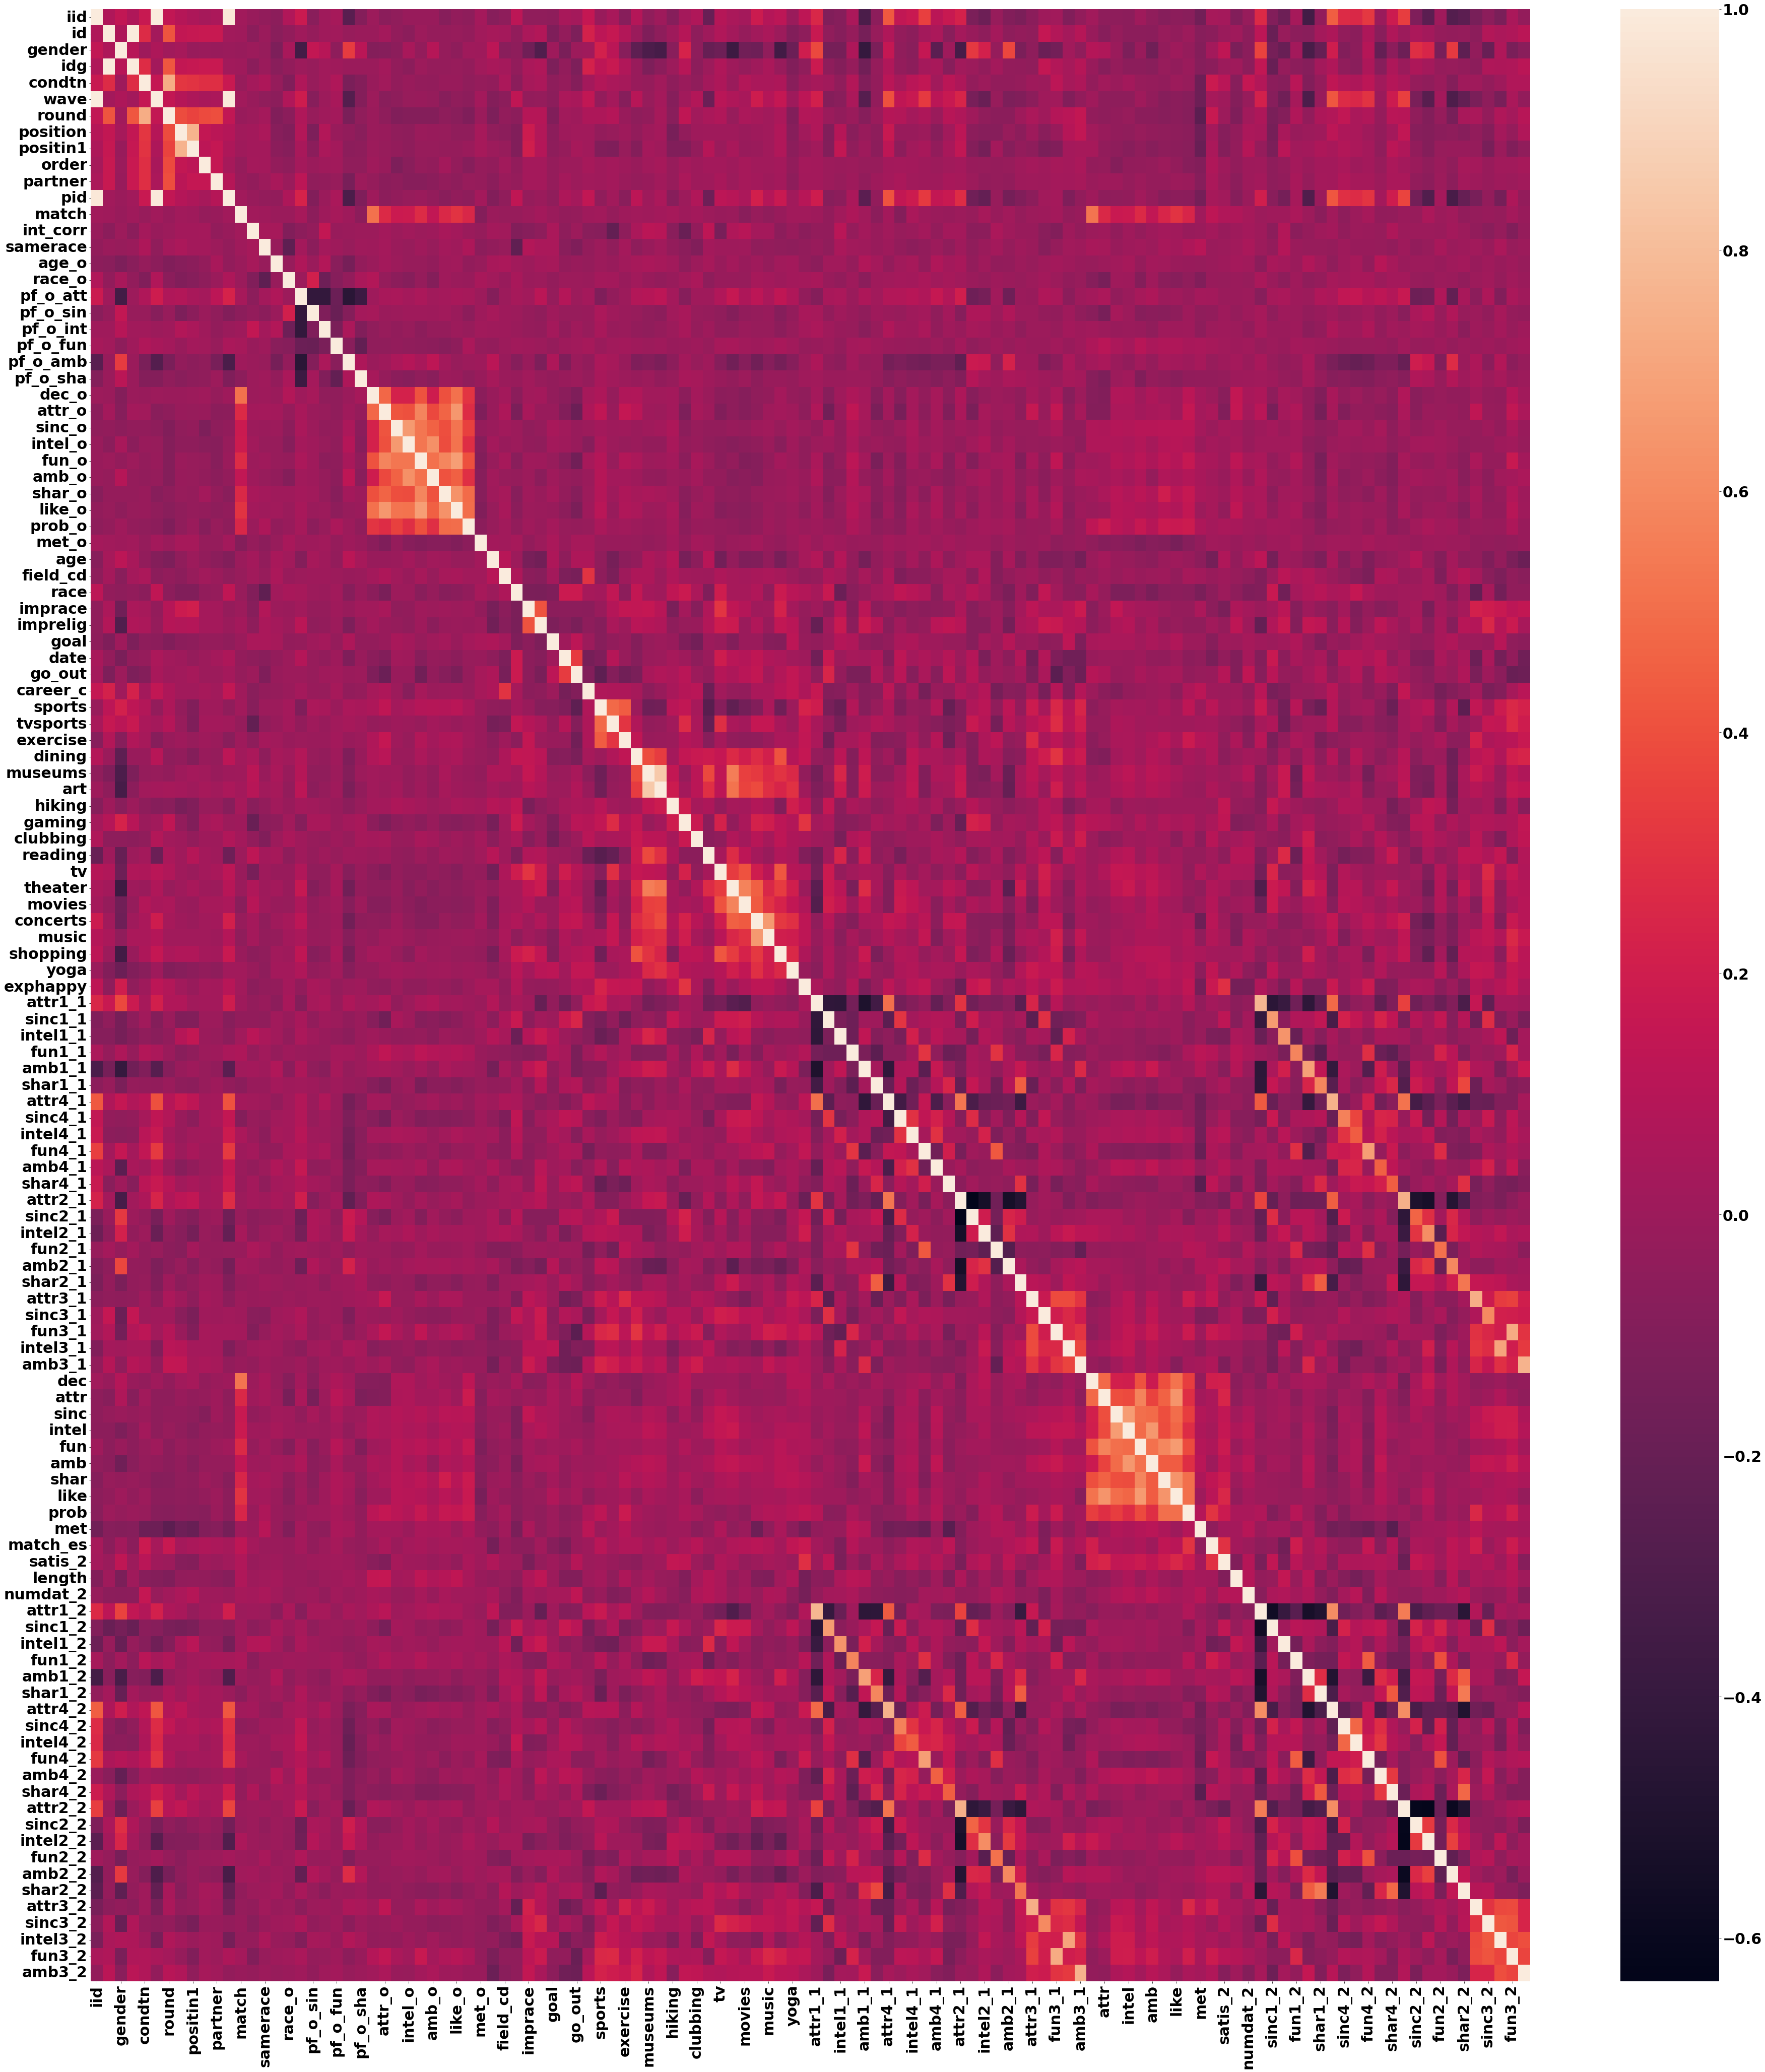

In [10]:
sns.heatmap(correlation, annot=False)

In [11]:
abs(correlation['match']).sort_values(ascending = False)

match       1.000000
dec         0.523519
dec_o       0.509099
like_o      0.299049
like        0.298684
              ...   
reading     0.001080
attr3_1     0.000887
intel4_2    0.000872
amb1_2      0.000740
imprace     0.000286
Name: match, Length: 120, dtype: float64

In [12]:
df.nunique()

iid         257
id           22
gender        2
idg          44
condtn        2
           ... 
attr3_2       9
sinc3_2       9
intel3_2      7
fun3_2        9
amb3_2        8
Length: 124, dtype: int64

With this filtered table, we will have 257 persons

In [13]:
df.match.value_counts()
#475 matchs

0    2289
1     475
Name: match, dtype: int64

In [19]:
df_matchs = df[(df.match == 1)]
df_matchs.groupby(by='wave')
df_matchs

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
1849,132,1.0,0,1,1,6,5,2,2.0,4,...,15.09,13.21,18.87,15.09,18.87,9.0,10.0,8.0,10.0,10.0
1856,134,3.0,0,5,1,6,5,4,4.0,2,...,17.50,12.50,20.00,12.50,15.00,7.0,8.0,9.0,7.0,9.0
1886,140,6.0,1,9,1,6,5,2,4.0,4,...,16.67,16.67,16.67,16.67,16.67,7.0,7.0,7.0,7.0,7.0
1978,147,6.0,0,11,2,7,16,3,3.0,1,...,13.95,13.95,20.93,13.95,13.95,8.0,8.0,9.0,9.0,8.0
1983,147,6.0,0,11,2,7,16,3,3.0,8,...,13.95,13.95,20.93,13.95,13.95,8.0,8.0,9.0,9.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,549,19.0,1,38,2,21,22,6,7.0,22,...,10.00,15.00,25.00,10.00,0.00,6.0,8.0,8.0,8.0,8.0
8305,549,19.0,1,38,2,21,22,11,7.0,5,...,10.00,15.00,25.00,10.00,0.00,6.0,8.0,8.0,8.0,8.0
8341,551,21.0,1,42,2,21,22,18,21.0,20,...,10.00,10.00,10.00,10.00,10.00,7.0,7.0,8.0,4.0,5.0
8346,551,21.0,1,42,2,21,22,8,21.0,10,...,10.00,10.00,10.00,10.00,10.00,7.0,7.0,8.0,4.0,5.0


In [22]:
df_matchs = df_matchs[(df_matchs.pid.isin(df_matchs.iid))]
df_matchs
#344 common matchs => 172 potential second dates
#df_matchs.to_csv('matchs.csv')
#df.Modified.where(df.Status.isin(['Finished','Cancelled']),'',inplace=True)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
1849,132,1.0,0,1,1,6,5,2,2.0,4,...,15.09,13.21,18.87,15.09,18.87,9.0,10.0,8.0,10.0,10.0
1886,140,6.0,1,9,1,6,5,2,4.0,4,...,16.67,16.67,16.67,16.67,16.67,7.0,7.0,7.0,7.0,7.0
1978,147,6.0,0,11,2,7,16,3,3.0,1,...,13.95,13.95,20.93,13.95,13.95,8.0,8.0,9.0,9.0,8.0
1983,147,6.0,0,11,2,7,16,3,3.0,8,...,13.95,13.95,20.93,13.95,13.95,8.0,8.0,9.0,9.0,8.0
2033,150,9.0,0,17,2,7,16,8,8.0,15,...,11.90,14.29,16.67,16.67,16.67,6.0,9.0,9.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,549,19.0,1,38,2,21,22,6,7.0,22,...,10.00,15.00,25.00,10.00,0.00,6.0,8.0,8.0,8.0,8.0
8305,549,19.0,1,38,2,21,22,11,7.0,5,...,10.00,15.00,25.00,10.00,0.00,6.0,8.0,8.0,8.0,8.0
8341,551,21.0,1,42,2,21,22,18,21.0,20,...,10.00,10.00,10.00,10.00,10.00,7.0,7.0,8.0,4.0,5.0
8346,551,21.0,1,42,2,21,22,8,21.0,10,...,10.00,10.00,10.00,10.00,10.00,7.0,7.0,8.0,4.0,5.0
